<a href="https://colab.research.google.com/github/princeKike27/Digit-Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer Neural Network

- Using NumPy I’m going to build a Neural Network that classifies Hand Written Digits from the MNIST dataset. The MNIST dataset consists of thousands of handwritten digits and is used for training image processing systems. I will create the Neural Network Architecture, perform Forward Propagation, find the Gradients of the Parameters using Backward Propagation, find the best parameters using Gradient Descent and get the Predictions and Accuracy of the Neural Network.



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading Data from Google Drive

In [1]:
# connect to google drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# go to Project Dir
%cd '/content/gdrive/My Drive/Data Science/Projects/Portafolio/Digit Recognizer'

# check contents of dir
%ls

/content/gdrive/My Drive/Data Science/Projects/Portafolio/Digit Recognizer
'Digit Recognizer.ipynb'   test.csv   train.csv


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Digit Data

<br>

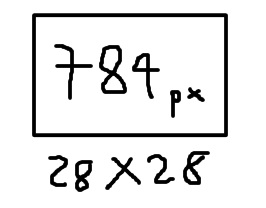

<br>

- Each Image is 784 pixels, 28 pixels long and 28 pixels wide

  - There are $m$ Training Examples
  - Each pixel is a value between $0$ and $255$

    - $0 = $ completely Black
    - $255 = $ completely White 
    



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of plots
sns.set()

In [4]:
# load data
data_df = pd.read_csv('train.csv')

data_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Train Test Split

- We are going to *Shuffle* Randomly the Digit Dataset and we are going to split the Data in the following way:

  - Train $⟶$ 80% of Data $⟶$ 33,600 examples

  - Test $⟶$ 20% of Data $⟶$ 8,400 examples

In [5]:
# turn df into array
data_array = np.array(data_df)

print(f'Data Array Shape: {data_array.shape}', '\n')

data_array

Data Array Shape: (42000, 785) 



array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [6]:
# set random seed
np.random.seed(1234)

# random shuffle data array
np.random.shuffle(data_array)

print(f'Data Array Shape: {data_array.shape}', '\n')

data_array

Data Array Shape: (42000, 785) 



array([[8, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Inputs

- With the Data already *Shuffled* we are going to create the $X$ Inputs for the *Train* and *Test* sets

<br>

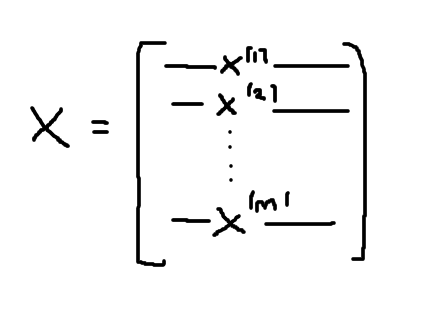

<br>

- Each Row constitutes an Example and has 784 Columns

  - **$X$ needs to be Transpose so it can be fed to the Neural Network**

    - Each Column will now consitute an Example and will be 784 Rows, with each Row corresponding to a Pixel in the Image

<br>

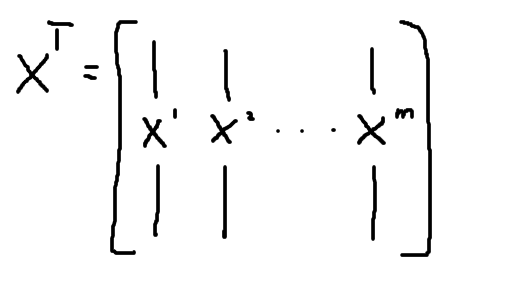

<br>


In [7]:
# create X array
X = data_array[:, 1:]

# check X shape
print(f'X shape: {X.shape}', '\n')

X

X shape: (42000, 784) 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
# X_train >> first 33,600 examples
X_train = X[:33600, :]

# check shape
print(f'X_train shape: {X_train.shape}', '\n')

X_train

X_train shape: (33600, 784) 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
# X_test >> last 8,400 examples
X_test = X[33600:, :]

# check shape
print(f'X_test shape: {X_test.shape}', '\n')

X_test

X_test shape: (8400, 784) 



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Transpose

<br>

- **Transpose X_train and X_test**

- We need to divide each pixel by 255:
  - $0 = $ completely Black
  - $1 = $ completely White



In [10]:
# create X_train Transpose
X_train_T = X_train.T

# divide each pixel by 255
X_train_T = X_train_T / 255 

# check shape
print(f'X_train Transpose shape: {X_train_T.shape}', '\n')

X_train_T

X_train Transpose shape: (784, 33600) 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# create X_test Transpose
X_test_T = X_test.T 

# divide each pixel by 255
X_test_T = X_test_T / 255

# check shape
print(f'X_test Transpose shape: {X_test_T.shape}', '\n')

X_test_T

X_test Transpose shape: (784, 8400) 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $Y$ Labels

- Each Label is the Correct Number from 0 to 9 that corresponds to the Image 

  - $Y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$

<br>

- With the data already *Shuffled* we are going to create the $Y$ Labels for the *Train* and *Test* sets

In [12]:
# create Y array
Y = data_array[:, 0]

# check shape
print(f'Y shape: {Y.shape}', '\n')

Y

Y shape: (42000,) 



array([8, 3, 1, ..., 9, 2, 3])

In [13]:
# Y_train >> first 33,600 rows
Y_train = Y[:33600]

# check shape
print(f'Y_train shape: {Y_train.shape}', '\n')

Y_train

Y_train shape: (33600,) 



array([8, 3, 1, ..., 5, 1, 9])

In [14]:
# Y_test >> last 8,400 rows
Y_test = Y[33600:]

# check shape
print(f'Y_test shape: {Y_test.shape}', '\n')

Y_test

Y_test shape: (8400,) 



array([7, 6, 5, ..., 9, 2, 3])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### One Hot Encode $Y$

- We need to One Hot Encode $Y$ so for that for example if:

  - $y = 4 ⟶ [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]$ 

<br>

- The Shape for this array will be $⟶ (Y.size \times 10)$

<br>

- After performing the encoding we need to Transpose the Matrix so it can be used in the Neural Network

In [15]:
# create Y_hot_test array >> (Y.size, 10)
Y_hot_test = np.zeros((Y_train.size, np.max(Y_train) + 1))

# check shape
print(f'Y_hot_test shape: {Y_hot_test.shape}', '\n')

Y_hot_test

Y_hot_test shape: (33600, 10) 



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# for each row >> place a 1 in the column == Y label
Y_hot_test[np.arange(Y_train.size), Y_train] = 1

# check first 10 rows
print('First 10 rows of Y One Hot Encoding:')
print(Y_hot_test[:10, :], '\n')

# print Y first 10 rows
print('First 10 rows of Y_train:')
print(Y_train[:10])

First 10 rows of Y One Hot Encoding:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

First 10 rows of Y_train:
[8 3 1 5 0 1 6 4 2 4]


In [17]:
# Transpose Y_hot to be used in the Neural Network
Y_hot_test_T = Y_hot_test.T

# check shape
print(f'Y_hot_test Transpose shape: {Y_hot_test_T.shape}', '\n')

# check first 10 columns
print('First 10 columns of Y_hot_test Transpose:')
print(Y_hot_test_T[:, 0:10], '\n')

# compare with Y first 10 rows
print('First 10 rows of Y_train:')
print(Y_train[:10])

Y_hot_test Transpose shape: (10, 33600) 

First 10 columns of Y_hot_test Transpose:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

First 10 rows of Y_train:
[8 3 1 5 0 1 6 4 2 4]


<br>

- Create Function

In [18]:
# create function to one hot encode Y
def one_hot_encode_Y(Y):

  # create zeros array >> (Y.size x np.max() + 1)
  Y_encoded = np.zeros((Y.size, np.max(Y) + 1))
  # for each row place a 1 where column == Y
  Y_encoded[np.arange(Y.size), Y] = 1
  # Transpose Y_encoded
  Y_encoded = Y_encoded.T

  return Y_encoded

In [19]:
# check function
Y_hot_test_2 = one_hot_encode_Y(Y_train)

# check shape
print(f'Y_hot_test_2 shape: {Y_hot_test_2.shape}', '\n')

# check first 10 columns
Y_hot_test_2[:, 0:10]

Y_hot_test_2 shape: (10, 33600) 



array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Neural Network Model

- Neural Network Model Architecture

<br>

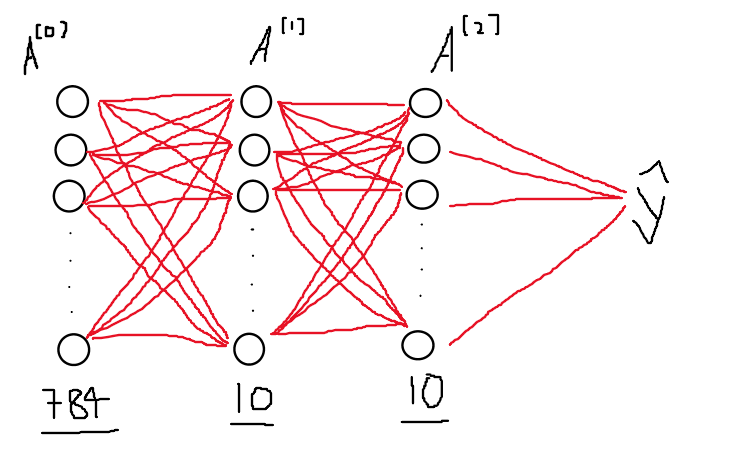

<br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Forward Propagation

- We Activate the Neurons from Left to Right with Random Values for $\vec{w}$ and $b$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### First Hidden Layer $A^{[1]}$

<br>

- Activation Function of Input Layer: 
  - $A^{[0]} = X_{train}.T$  $⟶ (784 \times m)$

<br>

- Weight Vector of Layer 1 $⟶$ Randomly Intialized
  - $\vec{w}^{[1]} ⟶ (10 \times 784) $

<br>

- Bias Vector of Layer 1 $⟶$ Randomly Initialized
  - $b^{[1]} ⟶ (10 \times 1)$

<br>

$$  Z^{[1]} = \vec{w}^{[1]} . A^{[0]} + b^{[1]} $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- $\vec{w}^{[1]}$

In [20]:
# initialize W_1 with random values
W_1 = np.random.rand(10, 784) - 0.5

# check shape
print(f'W_1 shape: {W_1.shape}', '\n')

W_1

W_1 shape: (10, 784) 



array([[ 0.10018526,  0.27024152, -0.10425398, ...,  0.03977656,
        -0.19204169,  0.27917658],
       [-0.01246459, -0.2273114 , -0.3945854 , ..., -0.47073963,
        -0.11926841, -0.16131885],
       [-0.13811131, -0.25510075,  0.36400978, ..., -0.40886568,
         0.35026816,  0.24657502],
       ...,
       [ 0.41321483,  0.11459695,  0.18882371, ..., -0.48432844,
        -0.30797211, -0.04951602],
       [ 0.4252755 , -0.06092248, -0.25681464, ...,  0.23727506,
         0.33005565,  0.44944876],
       [-0.20625993,  0.38042493, -0.4093005 , ...,  0.38636578,
        -0.39218521, -0.24056648]])

- $b^{[1]}$

In [21]:
# initialize b_1 with random values
b_1 = np.random.rand(10, 1) - 0.5

# check shape
print(f'b_1 shape: {b_1.shape}', '\n')

b_1

b_1 shape: (10, 1) 



array([[ 0.06375527],
       [-0.19665939],
       [ 0.29028259],
       [-0.00746405],
       [ 0.44770771],
       [-0.34655352],
       [-0.01836833],
       [ 0.03207773],
       [-0.16053592],
       [-0.40319448]])

- $Z^{[1]}$

In [22]:
# calculate Z_1 >> W_1 . X_train.T + b_1
Z_1 = np.dot(W_1, X_train_T) + b_1

# check shape
print(f'Z_1 shape: {Z_1.shape}', '\n')

Z_1

Z_1 shape: (10, 33600) 



array([[-1.78870194,  2.24761256, -1.28773424, ..., -0.39174886,
        -1.31890835, -0.59110971],
       [ 3.87930945,  0.63799353,  1.63323396, ...,  1.46127559,
         0.39477822,  2.94954909],
       [-0.68189621,  2.64569179, -1.75719049, ...,  1.86029524,
         0.56430477,  0.76624591],
       ...,
       [-0.77384532,  3.62413833, -2.6709754 , ..., -1.6367511 ,
        -0.32996064, -3.42701479],
       [ 2.00236601, -0.26697548, -0.96475475, ..., -0.22612377,
        -2.54676259,  3.83834852],
       [ 2.81861424, -2.24519015,  0.87229127, ...,  1.36969521,
         1.46882025,  2.79767782]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Activation Function of Layer 1

- We need to apply an Activation Function else each Node will be a *Linear Combination* of the Nodes Before, in this case the *Input Layer*

<br>

- The Activation Function that we are going to use is the *Rectified Linear Unit* or **ReLu**, it will Output the Input directly if its greater than 0, otherwise, it will Output 0

  - The function is LINEAR for values greater than 0, yet it is a NON-LINEAR function since negative values are Output as 0

    - $x$ if $x > 0$
    - $0$ if $x <= 0$


<br>

$$ ReLu(Z^{[1]}) = g(Z^{[1]}) = max(0, z) $$

<br>

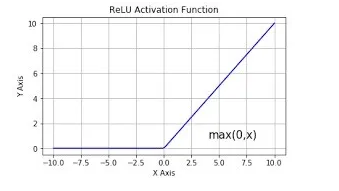

<br>

- The **Derivative of ReLu** is required when updating the Parameters of a Node when *Back Propagating*

  - $\partial{ReLu(x)} = 0$ when $x$ is negative
  - $\partial{ReLu(x)} = 1$ when $x$ is positive

In [23]:
# create ReLu >> max(0, Z_1)
  # np.maximum() >> compares two arrays and returns a new array containing the element wise maximum

ReLu_1 = np.maximum(0, Z_1)

# check shape
print(f'ReLu_1 shape: {ReLu_1.shape}', '\n')

ReLu_1

ReLu_1 shape: (10, 33600) 



array([[0.        , 2.24761256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.87930945, 0.63799353, 1.63323396, ..., 1.46127559, 0.39477822,
        2.94954909],
       [0.        , 2.64569179, 0.        , ..., 1.86029524, 0.56430477,
        0.76624591],
       ...,
       [0.        , 3.62413833, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.00236601, 0.        , 0.        , ..., 0.        , 0.        ,
        3.83834852],
       [2.81861424, 0.        , 0.87229127, ..., 1.36969521, 1.46882025,
        2.79767782]])

- $A^{[1]} = ReLu(Z^{[1]})$

In [24]:
# create A_1 >> ReLu_1
A_1 = ReLu_1

print(f'A_1 shape: {A_1.shape}', '\n')

A_1

A_1 shape: (10, 33600) 



array([[0.        , 2.24761256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.87930945, 0.63799353, 1.63323396, ..., 1.46127559, 0.39477822,
        2.94954909],
       [0.        , 2.64569179, 0.        , ..., 1.86029524, 0.56430477,
        0.76624591],
       ...,
       [0.        , 3.62413833, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.00236601, 0.        , 0.        , ..., 0.        , 0.        ,
        3.83834852],
       [2.81861424, 0.        , 0.87229127, ..., 1.36969521, 1.46882025,
        2.79767782]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Second Hidden Layer $A^{[2]}$

<br>

- Outputs of $A^{[1]}$
  - $A^{[1]} ⟶ (10 \times m)$

<br>

- Weight Vector of Layer 2 $⟶$ Randomly Initialized
  - $\vec{w}^{[2]} ⟶ (10 \times 10)$

<br>

- Bias Vector of Layer 1 $⟶$ Randomly Initialized
  - $b^{[2]} ⟶ (10 \times 1) $

<br>

$$ Z^{[2]} = \vec{w}^{[2]} . A^{[1]} + b^{[2]}  $$



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\vec{w}^{[2]}$

In [25]:
# initialize W_2 with random numbers
W_2 = np.random.rand(10, 10) - 0.5

# check shape
print(f'W_2 shape: {W_2.shape}', '\n')

W_2

W_2 shape: (10, 10) 



array([[-0.44801219,  0.45484081, -0.42830977,  0.23992531, -0.08978787,
         0.29858945, -0.01004943, -0.20977327, -0.49019339, -0.12520866],
       [ 0.2018425 , -0.05418279, -0.29054334,  0.47767178, -0.13246695,
        -0.47594137,  0.00935565, -0.13065259,  0.39389358,  0.44308036],
       [ 0.14986559, -0.33484229, -0.02705993,  0.0481415 , -0.40273572,
         0.19953519,  0.32753776, -0.23339772, -0.07220605, -0.09513168],
       [ 0.36958881,  0.07350885,  0.33619246,  0.1265511 ,  0.34977995,
        -0.07794758,  0.34752635, -0.10055172,  0.32876887,  0.34698984],
       [-0.44944691,  0.06006944, -0.05006133, -0.29523133, -0.42460835,
        -0.48741358,  0.48422618,  0.04849689, -0.18144966,  0.1851044 ],
       [ 0.28806573, -0.05125465, -0.15427557, -0.33905446,  0.32093458,
         0.19082146,  0.33783685,  0.00372629, -0.13409595,  0.32140638],
       [-0.21097135, -0.28163123,  0.07839156, -0.30495558,  0.07646872,
         0.4031674 ,  0.10581534,  0.09752058

<br>

- $b^{[2]}$

In [26]:
# initialize b_2 with random numbers
b_2 = np.random.rand(10, 1) - 0.5

# check shape
print(f'b_2 shape: {b_2.shape}', '\n')

b_2

b_2 shape: (10, 1) 



array([[-0.1560009 ],
       [ 0.10666   ],
       [ 0.41041884],
       [-0.0897063 ],
       [ 0.01438999],
       [ 0.17777019],
       [-0.076884  ],
       [-0.00068679],
       [ 0.03271707],
       [ 0.06012029]])

<br>

- $Z^{[2]}$

In [27]:
# calculate Z_2 >> W_2 . A_1 + b_2
Z_2 = np.dot(W_2, A_1) + b_2

# check shape
print(f'Z_2 shape: {Z_2.shape}', '\n')

Z_2

Z_2 shape: (10, 33600) 



array([[-0.02968964, -2.78540687,  0.3019453 , ..., -0.4652072 ,
        -0.39227788, -1.61314355],
       [ 1.53690245, -0.70862241,  0.15616333, ...,  0.09906162,
         0.62476076,  2.12355151],
       [-1.99935108,  0.08711669, -0.8424443 , ..., -0.07785582,
         0.49772785, -2.21192092],
       ...,
       [-0.99559752, -1.12782924, -0.73659456, ...,  0.2399807 ,
        -0.19576322,  0.50896598],
       [ 2.06726222, -1.0127949 ,  1.10500468, ...,  0.77989106,
         0.97442866,  1.11400079],
       [-0.57825199,  2.80924466, -0.41201918, ...,  0.23819482,
         0.13667023,  0.01647604]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##### Activation Function of Layer 2

- The Activation Function that is going to be used in Layer 2 is a **SOFMAX** Function

  - The SOFTMAX Function is used for Prediction in *Multi-Class* Models, it will return the probabilities of a digit being classified in each of the 10 Classes $[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$

  - The Probabilities determine the Target Class for the given Input

<br>

$$  f(Z) = \frac{e^{Z^{(i)}}}{\sum e^{Z^{(i)}}} $$

<br>


In [28]:
# function to calculate SoftMax

def calculate_softmax(Z):
  # calculate the probabilities of a digit being classified in each of the 10 classes
  softmax_z = np.exp(Z) / np.sum(np.exp(Z), axis=0) # column-wise

  return softmax_z

<br>

- $A^{[2]} = SoftMax(Z^{[2]})$

In [29]:
# calculate A_2
A_2 = calculate_softmax(Z_2)

# check_shape
print(f'A_2 shape: {A_2.shape}', '\n')

A_2

A_2 shape: (10, 33600) 



array([[0.01521205, 0.00208541, 0.09259022, ..., 0.04254444, 0.04015778,
        0.00377254],
       [0.07287021, 0.01663899, 0.08003   , ..., 0.0748    , 0.11103604,
        0.1582923 ],
       [0.00212214, 0.03687331, 0.02948241, ..., 0.06267111, 0.09778996,
        0.00207295],
       ...,
       [0.00579028, 0.01094127, 0.03277427, ..., 0.0861196 , 0.04887817,
        0.03149591],
       [0.1238461 , 0.01227514, 0.20669472, ..., 0.14776858, 0.15751532,
        0.05767897],
       [0.00878922, 0.56094115, 0.04534133, ..., 0.08596594, 0.06815362,
        0.01924724]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- Each Column in $A^{[2]}$ has the probabilities of a digit being classified in each of the 10 classes

In [30]:
# check colum 1000
A_2[:, 1000]

array([0.10526465, 0.02410599, 0.02675574, 0.22161143, 0.06107891,
       0.2872347 , 0.05036581, 0.01476682, 0.13805659, 0.07075937])

In [31]:
# with np.argmax() we get the index of the highest probability
np.argmax(A_2[:, 1000])

5



- After Forward Propagating through the Neural Network, with the Randomized Values of $w^{[1]}, w^{[2]}, b^{[1]}, b^{[2]}$, we get that the *Prediction* for the Digit in the $1001^{th}$ position of the *Training Set* is $5$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Forward Propagation Function

In [32]:
# create function to calculate Forward Propagation
def calculate_forward_prop(X, w1, b1, w2, b2):
  
  # Input Layer
  A_0 = X

  # Layer 1
  Z_1 = np.dot(w1, A_0) + b_1
  # apply ReLu >> max(0, Z_1)
  A_1 = np.maximum(0, Z_1)

  # Layer 2
  Z_2 = np.dot(w2, A_1) + b_2
  # apply Softmax
  A_2 = calculate_softmax(Z_2)

  return Z_1, A_1, Z_2, A_2


In [33]:
# check calculate_forward_prop
Z_1_test, A_1_test, Z_2_test, A_2_test = calculate_forward_prop(X_train_T, W_1, b_1, W_2, b_2)

A_2_test

array([[0.01521205, 0.00208541, 0.09259022, ..., 0.04254444, 0.04015778,
        0.00377254],
       [0.07287021, 0.01663899, 0.08003   , ..., 0.0748    , 0.11103604,
        0.1582923 ],
       [0.00212214, 0.03687331, 0.02948241, ..., 0.06267111, 0.09778996,
        0.00207295],
       ...,
       [0.00579028, 0.01094127, 0.03277427, ..., 0.0861196 , 0.04887817,
        0.03149591],
       [0.1238461 , 0.01227514, 0.20669472, ..., 0.14776858, 0.15751532,
        0.05767897],
       [0.00878922, 0.56094115, 0.04534133, ..., 0.08596594, 0.06815362,
        0.01924724]])

In [34]:
# check prediction of 1000 digit in the Training Set
print('Prediction for 1001th digit:', '\n')
print(A_2_test[:, 1000], '\n')

print(f'The Neural Network Predicts that the digit is: {np.argmax(A_2_test[:, 1000])}')

Prediction for 1001th digit: 

[0.10526465 0.02410599 0.02675574 0.22161143 0.06107891 0.2872347
 0.05036581 0.01476682 0.13805659 0.07075937] 

The Neural Network Predicts that the digit is: 5


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Backward Propagation

- To find the Best $W$ and $b$ that Minimize Cost $J$ we *Backward Propagate* the Neural Network from Rigth to Left

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Gradients of Second Hidden Layer

<br>

- $\partial{Z^{[2]}} =$ Error of the Second Layer

  - $\partial{Z^{[2]}}_{(10 \times m)} = A^{[2]}_{(10 \times m)} - Y_{(10 \times m)}$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}^{[2]}$

  - $\partial{\vec{w}^{[2]}}_{(10 \times 10)} = \frac{1}{m} \times \partial{Z^{[2]}}_{(10 \times m)} \times A^{[1]}.T_{(m \times 10)}$


<br>

- Partial Derivative of $J$ with respect to $b^{[2]}$

  - $\partial{b^{[2]}}_{(10 \times 1)} = \frac{1}{m} \sum \partial{Z^{[2]}}_{(10 \times m)}$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\partial{Z^{[2]}}$

In [35]:
# partial dev of Z_2
dZ_2 = A_2 - (one_hot_encode_Y(Y_train))

# check shape
print(f'dZ_2 shape: {dZ_2.shape}', '\n')

# check first 4 columns 
print('First 4 Colums:')
dZ_2[:, 0:4]

dZ_2 shape: (10, 33600) 

First 4 Colums:


array([[ 0.01521205,  0.00208541,  0.09259022,  0.00275864],
       [ 0.07287021,  0.01663899, -0.91997   ,  0.09007828],
       [ 0.00212214,  0.03687331,  0.02948241,  0.00197686],
       [ 0.59857736, -0.78530675,  0.21709303,  0.74776535],
       [ 0.01444988,  0.02739637,  0.04964477,  0.01189951],
       [ 0.15556682,  0.08463222,  0.21323854, -0.92998457],
       [ 0.00277595,  0.03352288,  0.0331107 ,  0.00229323],
       [ 0.00579028,  0.01094127,  0.03277427,  0.00790689],
       [-0.8761539 ,  0.01227514,  0.20669472,  0.05028312],
       [ 0.00878922,  0.56094115,  0.04534133,  0.0150227 ]])

<br>

- $\partial{\vec{w}^{[2]}}$

In [36]:
# store m
m = dZ_2.shape[1]

# partial dev of W_2
dW_2 = 1/m * np.dot(dZ_2, A_1.T)

# check shape
print(f'dW_2 shape: {dW_2.shape}', '\n')

# check first 3 columns
dW_2[:, 0:3]

dW_2 shape: (10, 10) 



array([[-0.22205145, -0.02318381, -0.38271813],
       [ 0.01959576,  0.02703111,  0.03400726],
       [-0.02420849, -0.17048289, -0.04798481],
       [ 0.28433618,  0.94959531,  0.58670449],
       [-0.03550948, -0.24657234, -0.0271579 ],
       [-0.02654782,  0.0271455 , -0.09360772],
       [-0.05152927, -0.11771537, -0.08828404],
       [ 0.00349274, -0.06520052, -0.10289411],
       [ 0.00270407, -0.1309968 ,  0.01225444],
       [ 0.04971775, -0.2496202 ,  0.10968052]])

<br>

- $b^{[2]}$

In [37]:
# partial dev of b_2
db_2 = 1/m * np.sum(dZ_2, axis=1)

# check shape
print(f'db_2 shape: {db_2.shape}', '\n')

db_2

db_2 shape: (10,) 



array([-0.04436071, -0.04436594, -0.07081976,  0.29721418, -0.0503465 ,
        0.0261422 , -0.07062958, -0.05202582,  0.02968207, -0.02049014])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Gradients of First Hidden Layer

<br>

- $\partial{Z^{[1]}}:$ we take the Error of the Second Layer and apply the errors in Reverse to get the Error of the First Layer

  - We Undo the Activation Function ReLu by multiplying by its Derivative

    - $\partial{ReLu} = $ $1$ if $Z > 0$, else $0$

  <br>

  - $\partial{Z^{[1]}}_{(10 \times m)} = \vec{w}^{[2]}.T_{(10 \times 10)} \times \partial{Z^{[2]}}_{(10 \times m)} \times \partial{ReLu(Z^{[1]})}_{(10 \times m)}$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}^{[1]}$

  - $\partial{\vec{w}^{[1]}}_{(10 \times 784)} = \frac{1}{m} \times \partial{Z^{[1]}}_{(10 \times m)} \times X.T_{(m \times 784)}$

<br>

- Partial Derivative of $J$ with respect to $b^{[1]}$

  - $\partial{b^{[1]}}_{(10 \times 1)} = \frac{1}{m} \sum \partial{Z^{[1]}}_{10 \times m}$



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<br>

- $\partial{ReLu(Z^{[1]})}$

In [38]:
# Partial Dev of ReLu == 1 if Z > 0 else 0
def dev_ReLu(Z):
  return Z > 0

# test function
dReLu_test = dev_ReLu(Z_1)

# check shape
print(f'dReLu_test shape: {dReLu_test.shape}', '\n')

dReLu_test

dReLu_test shape: (10, 33600) 



array([[False,  True, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False,  True],
       [ True, False,  True, ...,  True,  True,  True]])

<br>

- $\partial{Z^{[1]}}$

In [39]:
# partial dev of Z_1
dZ_1 = np.dot(W_2.T, dZ_2) * dev_ReLu(Z_1)

# check shape
print(f'dZ_1 shape: {dZ_1.shape}', '\n')

# check first 3 cols
dZ_1[:, 0:3]

dZ_1 shape: (10, 33600) 



array([[ 0.        , -0.25812944, -0.        ],
       [ 0.15821459, -0.27967777,  0.0408127 ],
       [ 0.        , -0.01232242,  0.        ],
       [-0.3365799 , -0.        , -0.        ],
       [-0.13969022, -0.21431683,  0.30613819],
       [-0.        , -0.        ,  0.        ],
       [ 0.07165455, -0.05337109,  0.21860747],
       [ 0.        ,  0.24927442,  0.        ],
       [ 0.41705291, -0.        , -0.        ],
       [-0.08799989, -0.        , -0.20076436]])

<br>

- $\partial{\vec{w}^{[1]}}$

In [40]:
# partial dev of W_1
dW_1 = 1/m * np.dot(dZ_1, X_train_T.T)

# check shape
print(f'dW_1 shape: {dW_1.shape}', '\n')

# check 3 cols
dW_1[: , 100:103]

dW_1 shape: (10, 784) 



array([[ 0.00721105,  0.00448545,  0.00232921],
       [ 0.00820526,  0.00660477,  0.00498378],
       [ 0.00510856,  0.00485417,  0.00394318],
       [ 0.00056633,  0.0007026 ,  0.00071435],
       [ 0.0135794 ,  0.01065096,  0.00683756],
       [-0.00708024, -0.0055774 , -0.00372028],
       [ 0.00255774,  0.00278512,  0.00222427],
       [ 0.00071086,  0.00056846,  0.00043332],
       [ 0.00266713,  0.00258704,  0.00219644],
       [ 0.00597232,  0.00483368,  0.00310274]])

<br>

- $\partial{b^{[1]}}$

In [41]:
# partial dev of b_1
db_1 = 1/m * np.sum(dZ_1, axis=1)

# check shape
print(f'db_1 shape: {db_1.shape}', '\n')

db_1

db_1 shape: (10,) 



array([ 0.09434682,  0.04509378,  0.10915524,  0.00977728,  0.17034329,
       -0.0007126 ,  0.06147708, -0.002135  ,  0.13153974,  0.06774375])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Backward Propagation Function

In [42]:
# function to calculate Backward Propagation
def calculate_backward_prop(X, Y, a2, z2, w2, a1, z1):

  # store m
  m = X.shape[1]

  '''Second Layer'''
  # error
  dZ_2 = a2 - one_hot_encode_Y(Y)
  # partial dev of W_2
  dW_2 = 1/m * np.dot(dZ_2, a1.T)
  # partial dev of b_2
  db_2 = 1/m * np.sum(dZ_2, axis=1) # sum column wise

  '''First Layer'''
  # error
  dZ_1 = np.dot(w2.T, dZ_2) * dev_ReLu(z1)
  # partial dev of W_1
  dW_1 = 1/m * np.dot(dZ_1, X.T)
  # partial dev of b_1
  db_1 = 1/m * np.sum(dZ_1, axis=1) # sum column wise

  return dZ_2, dW_2, db_2, dZ_1, dW_1, db_1



![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Gradient Descent 

- **Update Parameters Until Convergence**

<br>

$$ \vec{w}^{[2]} = \vec{w}^{[2]} - \alpha \times \partial{\vec{w}^{[2]}}$$
<br>
$$ b^{[2]} = b^{[2]} - \alpha \times \partial{b^{[2]}} $$
<br>
$$\vec{w}^{[1]} = \vec{w}^{[1]} - \alpha \times \partial{\vec{w}^{[1]}}$$
<br>
$$ b^{[1]} = b^{[1]} - \alpha \times \partial{b^{[1]}} $$

<br>


In [43]:
# function to calculate gradient descent
def calculate_gradient_descent(X, Y, w1, b1, w2, b2, alpha, num_iter, calculate_forward_prop, calculate_backward_prop):

  '''Calculate Batch Gradient Descent to find the best
     Parameters that Minimize Cost'''

  for i in range(num_iter):

    # Forward Propagate Neural Network
    Z_1, A_1, Z_2, A_2 = calculate_forward_prop(X, w1, b1, w2, b2)

    # Backward Propagate to find Gradients
    dZ_2, dW_2, db_2, dZ_1, dW_1, db_1 = calculate_backward_prop(X, Y, A_2, Z_2, w2, A_1, Z_1)

    # Update Params
    w2 = w2 - alpha * dW_2
    b2 = b2 - alpha * db_2
    w1 = w1 - alpha * dW_1
    b1 = b1 - alpha * db_1

    if i % 10 == 0:
      # calculate predictions of ith iteration
      predictions = np.argmax(A_2, axis=0) # returns the index of the Highest Probability in the array
      # calculate accuracy of ith iteration
      accuracy = np.sum(predictions == Y) / Y.size
      print(f'Iteration: {i}, Predictions: {predictions}, Y: {Y}, Accuracy: {accuracy:.4f}')

  
  return w2, b2, w1, b1



In [44]:
# run gradient descent

# set alpha and num_iter
alpha = 0.1
num_iter = 500

W_2f, b_2f, W_1f, b_1f = calculate_gradient_descent(X_train_T, Y_train, W_1, b_1, W_2, b_2, alpha, num_iter,
                                                    calculate_forward_prop, calculate_backward_prop)


Iteration: 0, Predictions: [3 9 3 ... 3 3 3], Y: [8 3 1 ... 5 1 9], Accuracy: 0.1082
Iteration: 10, Predictions: [8 9 8 ... 8 1 1], Y: [8 3 1 ... 5 1 9], Accuracy: 0.1878
Iteration: 20, Predictions: [3 9 1 ... 8 1 1], Y: [8 3 1 ... 5 1 9], Accuracy: 0.2870
Iteration: 30, Predictions: [3 9 1 ... 1 1 1], Y: [8 3 1 ... 5 1 9], Accuracy: 0.3559
Iteration: 40, Predictions: [3 9 1 ... 3 1 3], Y: [8 3 1 ... 5 1 9], Accuracy: 0.4104
Iteration: 50, Predictions: [3 9 1 ... 3 1 3], Y: [8 3 1 ... 5 1 9], Accuracy: 0.4519
Iteration: 60, Predictions: [3 9 1 ... 8 1 3], Y: [8 3 1 ... 5 1 9], Accuracy: 0.4867
Iteration: 70, Predictions: [3 9 1 ... 8 1 9], Y: [8 3 1 ... 5 1 9], Accuracy: 0.5189
Iteration: 80, Predictions: [3 3 1 ... 8 1 9], Y: [8 3 1 ... 5 1 9], Accuracy: 0.5481
Iteration: 90, Predictions: [3 3 1 ... 8 1 9], Y: [8 3 1 ... 5 1 9], Accuracy: 0.5759
Iteration: 100, Predictions: [3 3 1 ... 8 1 9], Y: [8 3 1 ... 5 1 9], Accuracy: 0.5995
Iteration: 110, Predictions: [3 3 1 ... 5 1 9], Y: [8 

In [45]:
# Best Params that minimize Cost J

# W_1
print(f'Shape of W_1f: {W_1f.shape}')
print(W_1f[:, 0:4], '\n')

# b_1
print(f'Shape of b_1f: {b_1f.shape}')
print(b_1f[:, 0:4], '\n')

# W_2
print(f'Shape of W_2f: {W_2f.shape}')
print(W_2f[:, 0:4], '\n')

# b_2
print(f'Shape of b_2f: {b_2f.shape}')
print(b_2f[:, 0:4])

Shape of W_1f: (10, 784)
[[ 0.10018526  0.27024152 -0.10425398 -0.13121196]
 [-0.01246459 -0.2273114  -0.3945854   0.21282237]
 [-0.13811131 -0.25510075  0.36400978 -0.20450945]
 [ 0.09011642  0.29569363  0.19264943 -0.06993796]
 [ 0.31307724 -0.40782187  0.18249466  0.2127946 ]
 [ 0.14168542  0.34202583 -0.39394067  0.04325267]
 [-0.13507392 -0.30693353 -0.05911382 -0.1313257 ]
 [ 0.41321483  0.11459695  0.18882371  0.08697759]
 [ 0.4252755  -0.06092248 -0.25681464 -0.341997  ]
 [-0.20625993  0.38042493 -0.4093005  -0.35601516]] 

Shape of b_1f: (10, 10)
[[ 0.01108872  0.20892499  0.20169646  0.10387734]
 [-0.24932593 -0.05148967 -0.0587182  -0.15653732]
 [ 0.23761604  0.43545231  0.42822378  0.33040466]
 [-0.0601306   0.13770567  0.13047714  0.03265802]
 [ 0.39504116  0.59287743  0.58564889  0.48782977]
 [-0.39922006 -0.2013838  -0.20861233 -0.30643145]
 [-0.07103488  0.12680138  0.11957285  0.02175373]
 [-0.02058882  0.17724745  0.17001892  0.07219979]
 [-0.21320247 -0.01536621 -0.0

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Accuracy on Test Dataset


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Forward Propagate Neural Network on Test Dataset

In [46]:
# forward propagate with Paramns that Minimize Cost J
Z_1t, A_1t, Z_2t, A_2t = calculate_forward_prop(X_test_T, W_1f, b_1f, W_2f, b_2f)

# check shape of A_2t
print(f'A_2t shape: {A_2t.shape}', '\n')

# check first 4 cols
A_2t[:, 0:4]

A_2t shape: (10, 8400) 



array([[2.67968713e-05, 8.26495488e-06, 4.48430636e-02, 1.97008757e-04],
       [9.98572477e-09, 4.63796875e-09, 4.96396246e-07, 7.73450011e-08],
       [9.13656183e-04, 3.54389066e-04, 2.15670412e-03, 4.47837032e-03],
       [1.27297768e-04, 1.59632362e-08, 1.31049935e-02, 2.45505693e-05],
       [3.07588998e-02, 6.35396029e-05, 1.18078845e-04, 3.46130410e-01],
       [2.66780041e-04, 1.54197941e-05, 9.05039358e-01, 3.48760069e-04],
       [4.99192273e-02, 9.99484207e-01, 4.63846633e-03, 6.38748301e-01],
       [5.72034770e-01, 1.16633046e-08, 2.76288275e-06, 9.62538813e-05],
       [3.65423445e-02, 7.28376470e-05, 2.98186063e-02, 3.84041334e-03],
       [3.09410217e-01, 1.30961539e-06, 2.77470324e-04, 6.13585492e-03]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Get Predictions

In [47]:
# get Predictions of A_2t with np.argmax()
predictions = np.argmax(A_2t, axis=0)

# check shape
print(f'Predictions shape: {predictions.shape}', '\n')
# check first 100 predictions
print('First 100 predictions:')
print(predictions[:100], '\n')

# check first 100 labels
print('First 100 labels:')
print(Y_test[:100])

Predictions shape: (8400,) 

First 100 predictions:
[7 6 5 6 9 5 9 9 7 6 0 4 4 9 1 1 8 7 3 1 7 6 7 4 4 1 3 0 7 5 2 2 7 8 2 1 6
 7 8 7 2 1 9 3 6 9 1 0 6 5 1 9 9 6 6 4 9 8 3 2 3 1 1 0 0 9 8 8 4 3 4 3 0 8
 1 6 2 2 6 7 5 3 3 9 3 9 1 1 4 0 6 6 3 1 9 6 4 3 3 0] 

First 100 labels:
[7 6 5 6 8 0 9 9 7 6 0 4 4 9 1 1 8 7 3 1 7 6 7 8 4 1 3 0 2 5 2 2 7 8 2 1 4
 7 8 7 2 1 9 2 6 9 1 0 2 5 1 4 9 4 6 4 9 8 3 5 3 1 1 0 0 9 8 5 4 3 4 3 0 8
 1 6 2 2 2 7 5 3 3 9 3 8 1 1 4 0 6 6 3 1 9 6 4 3 3 0]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Accuracy of Neural Network Model

<br>

$$ Accuracy = \frac{\text{Correct Predictions}}{\text{Total Number of Labels}} $$

<br>


In [48]:
# calculate Accuracy
accuracy = np.sum(predictions == Y_test) / Y_test.size

print(f'The Accuracy of the Neural Network on the Test Dataset is: {accuracy:.4f}')

The Accuracy of the Neural Network on the Test Dataset is: 0.8323


- **An Accuracy of 0.8323 on the Test Dataset means that on average, the Neural Network correctly classifies a Hand Written Digit 83.23% of the times on New Data**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Show Predictions with Hand Written Digit Image

Prediction at Index 17: 7
Label at Index 17: 7 



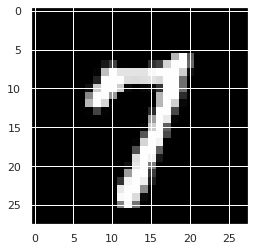

In [49]:
# prediction at index 17
prediction_17 = predictions[17]
print(f'Prediction at Index 17: {prediction_17}')

# label at index 17
label_17 = Y_test[17]
print(f'Label at Index 17: {label_17}', '\n')

# image at index 17
X_test_17 = X_test[17]
# each image is 28 * 28 >> reshape
img_17 = X_test_17.reshape(28, 28)

# show img
plt.gray() # set colormap to gray
plt.imshow(img_17, interpolation='nearest')

plt.show()

Prediction at index 1012: 0
Label at index 1012: 0 



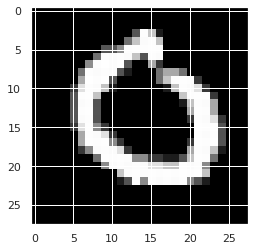

In [50]:
# prediction at index 1012
prediction_1012 = predictions[1012]
print(f'Prediction at index 1012: {prediction_1012}')

# label at index 1012
label_1012 = Y_test[1012]
print(f'Label at index 1012: {label_1012}', '\n')

# image at index 1012
X_test_1012 = X_test[1012]
# each image is 28 x 28 pixels
img_1012 = X_test_1012.reshape(28, 28)

# show img
plt.gray()
plt.imshow(img_1012, interpolation='nearest')

plt.show()

Prediction at index 5099: 6
Label at index 5099: 6 



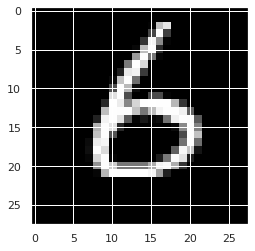

In [51]:
# prediction at index 5099
prediction_5099 = predictions[5099]
print(f'Prediction at index 5099: {prediction_5099}')

# Label at index 5099
label_5099 = Y_test[5099]
print(f'Label at index 5099: {label_5099}', '\n')

# image at index 5099
X_test_5099 = X_test[5099]
# each img is 28 x 28 pixels
img_5099 = X_test_5099.reshape(28, 28)

# show img
plt.gray()
plt.imshow(img_5099, interpolation='nearest')

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)